In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from scipy import stats

In [64]:
df = pd.read_csv("UCMF_100.csv")

print(df.describe(include='all'))


               ID       Peso      Altura        IMC Atendimento        DN  \
count   99.000000  97.000000   99.000000  73.000000          97        97   
unique        NaN        NaN         NaN        NaN          93        94   
top           NaN        NaN         NaN        NaN    11/05/06  29/03/91   
freq          NaN        NaN         NaN        NaN           2         2   
mean    50.000000  22.425773   85.535354  17.890411         NaN       NaN   
std     28.722813  17.853351   57.102720   3.285328         NaN       NaN   
min      1.000000   0.000000    0.000000  10.000000         NaN       NaN   
25%     25.500000   8.000000   50.000000  16.000000         NaN       NaN   
50%     50.000000  19.000000  101.000000  17.000000         NaN       NaN   
75%     74.500000  34.500000  132.500000  20.000000         NaN       NaN   
max     99.000000  83.000000  177.000000  27.000000         NaN       NaN   

            IDADE Convenio   PULSOS  PA SISTOLICA  ...            PPA  \
co

# Missing values

In [65]:
mv = np.where(pd.isnull(df))

print(f"rows with missing values: {len(np.unique(mv[0]))}")
print(f"collumns with missing values: {len(np.unique(mv[1]))}")

rows with missing values: 97
collumns with missing values: 18


In [66]:
df2 = df.copy()
mv2 = np.where(pd.isnull(df2))

numerical_cols = df2.select_dtypes(include='number')
imputer = SimpleImputer(strategy='mean')
df2[numerical_cols.columns] = imputer.fit_transform(numerical_cols)


categorical_cols = df2.select_dtypes(exclude='number')
imputer = SimpleImputer(strategy='most_frequent')
df2[categorical_cols.columns] = imputer.fit_transform(categorical_cols)

mv2 = np.where(pd.isnull(df2))
print(f"rows with missing values: {len(np.unique(mv2[0]))}")
print(f"collumns with missing values: {len(np.unique(mv2[1]))}")

rows with missing values: 0
collumns with missing values: 0


# Outliers

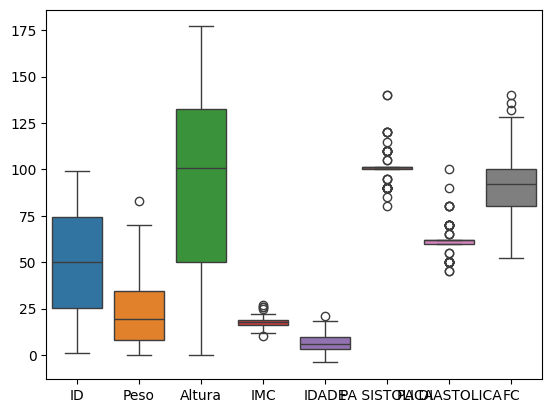

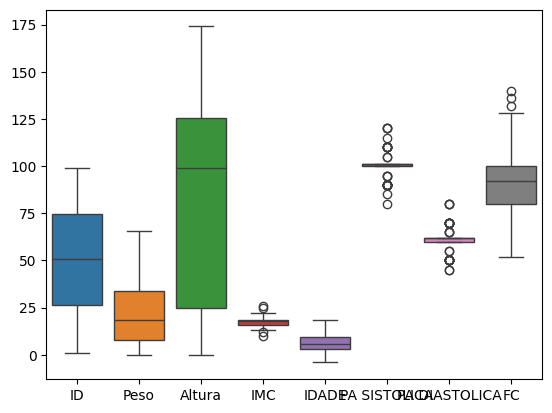

In [67]:
sns.boxplot(df2)
plt.show()

def remove_outliers(df, z_threshold=3):
    
    numerical_cols = df.select_dtypes(include=[np.number])

    # Calculate the z-scores for numerical columns
    z_scores = np.abs(stats.zscore(df[numerical_cols.columns]))

    # Create a boolean mask for outliers
    outlier_mask = (z_scores > z_threshold).any(axis=1)

    # Remove rows with outliers from the entire DataFrame
    df_no_outliers = df[~outlier_mask]

    return df_no_outliers

df2 = remove_outliers(df2)

sns.boxplot(df2)
plt.show()


# Data reduction


In [71]:
if 'ID' in df2:
    df2 =df2.drop('ID',axis=1)
    
df2.describe()

,Peso,Altura,IMC,IDADE,PA SISTOLICA,PA DIASTOLICA,FC
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,20.917385,82.536842,17.685797,6.061079,99.971053,60.944737,92.348304
std,15.826468,56.248463,2.534724,4.602566,6.857742,6.386056,17.385331
min,0.000000,0.000000,10.000000,-4.050000,80.000000,45.000000,52.000000
25%,7.600000,25.000000,16.000000,2.885000,100.000000,60.000000,80.000000
50%,18.300000,99.000000,17.890411,5.760000,101.083333,61.916667,92.000000
75%,33.750000,125.500000,18.500000,9.515000,101.083333,61.916667,100.000000
max,65.600000,174.000000,26.000000,18.360000,120.000000,80.000000,140.000000


# Normalization

In [74]:
numerical_cols = df2.select_dtypes(include=[np.number])
for col in numerical_cols.columns: 
    df2[col] = df2[col]  / df2[col].abs().max() 

df2.describe()

,Peso,Altura,IMC,IDADE,PA SISTOLICA,PA DIASTOLICA,FC
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,0.318863,0.474350,0.680223,0.330124,0.833092,0.761809,0.659631
std,0.241257,0.323267,0.097489,0.250684,0.057148,0.079826,0.124181
min,0.000000,0.000000,0.384615,-0.220588,0.666667,0.562500,0.371429
25%,0.115854,0.143678,0.615385,0.157135,0.833333,0.750000,0.571429
50%,0.278963,0.568966,0.688093,0.313725,0.842361,0.773958,0.657143
75%,0.514482,0.721264,0.711538,0.518246,0.842361,0.773958,0.714286
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df2.to_csv("new_data.csv")